# Sparse matrices

This notebook gives an idea of what sparse matrices are and why they can be useful in numerical methods.
The functionality is provided by the module [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html).

In [1]:
import numpy as np
from scipy import sparse as sp
from matplotlib import pyplot as plt

## Reasons for sparsity

Consider a generic matrix $A$ whose dimensions are $n \times m$.
Let $a_{i,j}$ be the element of $A$ in row $i$, column $j$.
Let $\mathbf{1}(\cdot)$ denote the indicator function.
Define the _sparsity_ $s$ and the _density_ $d$ in the following way
\begin{align*}
    s &\equiv \dfrac{1}{n \cdot m} \cdot \sum_{i=1}^{n} \sum_{j=1}^{m} \mathbf{1}(a_{i,j} = 0) \\
    d &\equiv \dfrac{1}{n \cdot m} \cdot \sum_{i=1}^{n} \sum_{j=1}^{m} \mathbf{1}(a_{i,j} \neq 0).
\end{align*}
Clearly, $s = 1 - d$.
In words, the sparsity of a matrix is the relative frequency with which elements of $A$ are zero.
When $s$ is sufficiently high (say, higher than 0.5), then we say that $A$ is sparse.

From a mathematical point of view, a sparse matrix has nothing special relative to a non-sparse matrix.
When we perform symbolic operations (e.g., pencil and paper calculations), we simply use the zeros to avoid computing a tedious bunch of multiplications.
This allows our brain to save time, as it avoids thinking about operations that would anyway result in a zero.

From a Computer Science perspective, a sparse matrix is indeed special.
Say you represent $A$ as a `numpy.ndarray` in your program.
For example, let $A$ be an identity matrix.

In [2]:
n = 10000

A = np.eye(n, dtype=int)
SA = sp.eye(n) # sparse representation of A
s = (1 / n**2) * np.sum(A == 0)

print('Sparsity of A is {:.2f}%'.format(s*100))
print(' Density of A is  {:.2f}%'.format((1-s)*100))

Sparsity of A is 99.99%
 Density of A is  0.01%


Now, if we compute some operations with $A$, the underlying program (be it Python, Matlab, or whatever language of choice) is going to actually perform all the multiplications that also involve multiplying by zero.

Here, we look at the difference in speed between multiplying two similarly sparse matrices $A$ and $B$ with two approaches.
One is by using the full-array representation of $A$ and $B$ and one by using their sparse representations.

First, we generate a random matrix $B$ that is sparse, and we compute its sparse equivalent $S_B$.

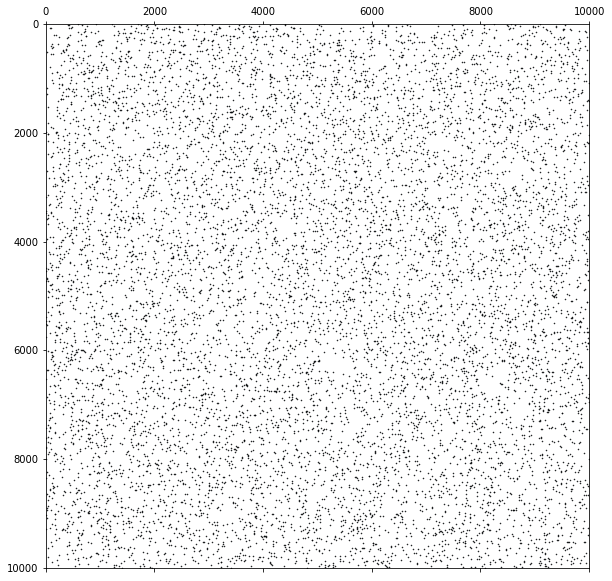

In [3]:
# generating a random matrix with given sparsity, converting it to full array
SB = sp.random(n, n, density=1-s)
B = SB.toarray()

# plotting all non-zero entries of input argument
fig, ax = plt.subplots(figsize=(10, 10))
ax.spy(B, marker='.', markersize=1, markeredgecolor='black')

In [ ]:
%%timeit
C = A.dot(B)

In [ ]:
%%timeit
SC = SA.dot(SB)

## Constructing a sparse matrix

### Dictionary of keys


### List of lists


### Compressed sparse column (or row)

![CSmatrix](https://en.wikipedia.org/wiki/Sparse_matrix#/media/File:Row_and_column_major_order.svg)
